## Lagrange Interpolation

In [44]:
import numpy as np

# xdata,ydata are arrays of the given data
# x is a single(not an array) x-value at which the data is to be interpolated
def interplagrange(xdata,ydata,x):
    n = len(xdata)
    ans = 0
    for i in range(n):
        numr = 1; denmr = 1
        for j in range(n):
            if (j != i):
                numr *= (x - xdata[j])
                denmr *= (xdata[i] - xdata[j])
        ans += (numr/denmr) * ydata[i]
    return ans



Text(0.5, 1.0, 'Error in interpolation')

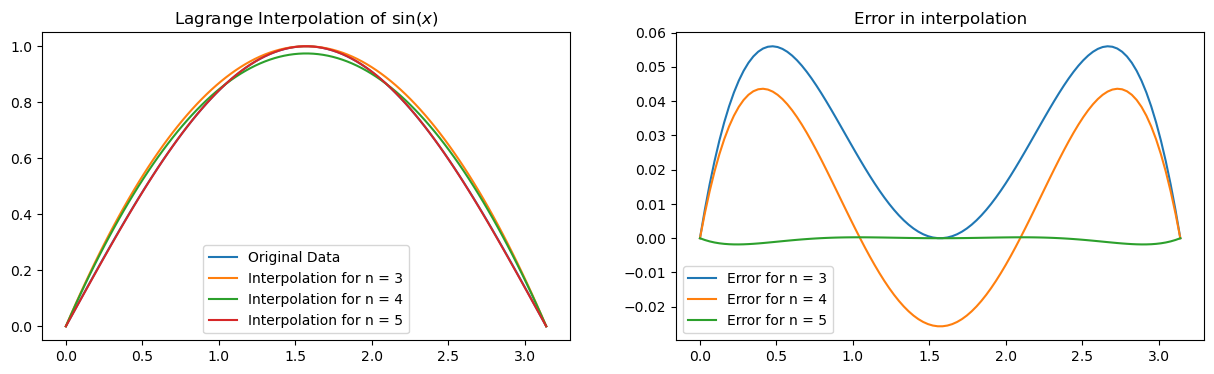

In [45]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
xinterp = np.linspace(0,np.pi,100)
ytrue = np.sin(xinterp)
N = len(xinterp)
ax1.plot(xinterp,ytrue,label = 'Original Data')
for n in [3,4,5]:
    xdata = np.linspace(0,np.pi,n)
    ydata = np.sin(xdata)
    yinterp = np.array([])
    error = np.array([])
    for i in range(N):
        y = interplagrange(xdata,ydata,xinterp[i])
        yinterp = np.append(yinterp,y)
        error = np.append(error,y - ytrue[i])
    ax1.plot(xinterp,yinterp,label = 'Interpolation for n = '+ str(n))
    ax2.plot(xinterp,error,label = 'Error for n = '+ str(n))

ax1.legend();ax2.legend()
ax1.set_title(r'Lagrange Interpolation of $\sin(x)$')
ax2.set_title('Error in interpolation')

## Neville's Interpolation

### Sorting the data so that the closest xdata to x is the first element, 2nd closest 2nd element and so on. Then applying the Neville's interpolation on that sorted data, we have to keep track only of the errors in the diagonal elements of the Neville's table for tolerance check

In [64]:
import numpy as np
xdata = np.array([1,2,3,4,7,9,10,8])
ydata = xdata**2
x = 3.6
Error = abs(xdata - x)
n = len(xdata)
for i in range(n-1):
    for j in range(n-i-1):
        if Error[j]>Error[j+1]:
            Error[j],Error[j+1] = Error[j+1],Error[j]
            xdata[j],xdata[j+1] = xdata[j+1],xdata[j]
            ydata[j],ydata[j+1] = ydata[j+1],ydata[j]

print('Sorted Errors: ',Error)            
print('Sorted xdata: ',xdata)
print('Sorted ydata: ',ydata)

Sorted Errors:  [0.4 0.6 1.6 2.6 3.4 4.4 5.4 6.4]
Sorted xdata:  [ 4  3  2  1  7  8  9 10]
Sorted ydata:  [ 16   9   4   1  49  64  81 100]


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Use Bubble Sort algorithm to sort the data so that nearest xdata to x is X[0], second nearest is X[1] and so on.
# Then applying the Neville's interpolation on that sorted data, we have to keep track only of the errors in the 
# diagonal elements of the Neville's table for estimating error in the interpolated value
def nevsort(xdata,ydata,x):
    n = len(xdata)
    X = xdata.copy()
    Y = ydata.copy()
    error = abs(X - x)
    for i in range(n-1):
        for j in range(n-i-1):
            if error[j]>error[j+1]:
                error[j],error[j+1] = error[j+1],error[j]
                X[j],X[j+1] = X[j+1],X[j]
                Y[j],Y[j+1] = Y[j+1],Y[j]
    return X,Y

# Generates a matrix for Neville's Table
def nevilleTable(xdata,ydata,x):
    n = len(xdata)
    X,Y = nevsort(xdata,ydata,x)
    Q = np.zeros((n,n))
    Q[:,0] = Y
    for j in range(1,n):
        Q[j:n,j] = ((x - X[0:n-j])*Q[j:n,j-1] - (x - X[j:n])*Q[j-1:n-1,j-1])/(X[j:n] - X[0:n-j])
    return Q

# Returns the n-1 order polynomial interpolated value Y[n-1] with the estimated error Y[n-1]-Y[n-2]
def nevilleInterp(xdata,ydata,x):
    n = len(xdata)
    X,Y = nevsort(xdata,ydata,x)
    for j in range(1,n):
        Y[j:n] = ((x - X[0:n-j])*Y[j:n] - (x - X[j:n])*Y[j-1:n-1])/(X[j:n] - X[0:n-j])
    return Y[n-1],Y[n-1]-Y[n-2]

xdata = np.linspace(1,4,6)
ydata = xdata**5
x = 1.2
y,error = nevilleInterp(xdata,ydata,x)
Q = nevilleTable(xdata,ydata,x)
print('True y = ',x**5)
print('Interpolated y = ',y)
print('True error = ',y-x**5)
print('Estimated error = ',error)
print('Neville''s Table: \n',Q)

True y =  2.4883199999999994
Interpolated y =  2.4883200000000083
True error =  8.881784197001252e-15
Estimated error =  0.28160000000000895
Nevilles Table: 
 [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.04857600e+01  4.16192000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.15363200e+01 -1.68812800e+01  6.54720000e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.72103680e+02 -1.49409280e+02  2.72947200e+01  3.61472000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.54354240e+02 -5.80564480e+02  2.09886720e+02 -1.32812800e+01
   2.20672000e+00  0.00000000e+00]
 [ 1.02400000e+03 -1.63434688e+03  8.24478720e+02 -1.31553280e+02
   6.43072000e+00  2.48832000e+00]]


## Cubic Natural Spline Interpolation

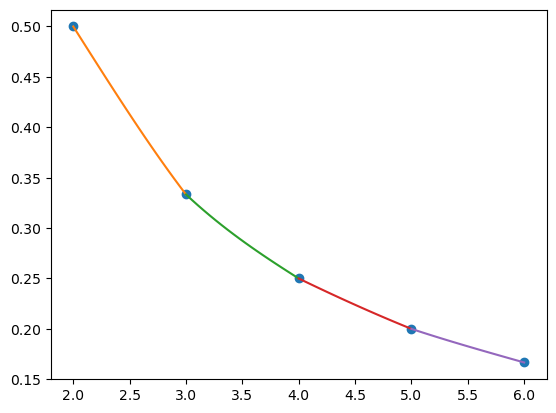

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# ith cubic spline function interpolating in the interval [xdata_i,xdata_i+1]
def spline(i,x):
    hi = xdata[i+1]-xdata[i]
    first_term = (ydd[i]*((xdata[i+1]-x)**3) + ydd[i+1]*((x-xdata[i])**3))/(6*hi)
    second_term = ((ydata[i]/hi)-(hi*ydd[i]/6))*(xdata[i+1]-x) + ((ydata[i+1]/hi)-(hi*ydd[i+1]/6))*(x-xdata[i])
    return first_term + second_term

xdata = np.array([2,3,4,5,6])
ydata = np.array([1/2,1/3,1/4,1/5,1/6])
ydd = np.array([0,17/280,1/140,3/280,0])

x0r = np.linspace(2,3,20)
x1r = np.linspace(3,4,20)
x2r = np.linspace(4,5,20)
x3r = np.linspace(5,6,20)

y0s = spline(0,x0r)
y1s = spline(1,x1r)
y2s = spline(2,x2r)
y3s = spline(3,x3r)

ys = np.concatenate((y0s,y1s,y2s,y3s))
xr = np.concatenate((x0r,x1r,x2r,x3r))


plt.plot(xdata,ydata,'o')
plt.plot(x0r,y0s)
plt.plot(x1r,y1s)
plt.plot(x2r,y2s)
plt.plot(x3r,y3s)

#plt.plot(np.linspace(2,6,50),1/np.linspace(2,6,50))